In [1]:
#Invocar Pandas y otras cosas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pylab import *
import matplotlib.pyplot as plt
import time

In [2]:
#Leemos los datos
df0M = pd.read_csv("meteo-nogal-09.csv",encoding="cp1252")
df0S = pd.read_csv("soil-nogal-09.csv",encoding="cp1252")
#df0M
#df0S

C:\Users\Eduardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,7,8,12,13,15,16,17,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Seleccionar un día de Enero, y graficar la temperatura del aire, y las 4 temperaturas del subsuelo#

In [4]:
#Agarraremos los datos de un día de enero (en este caso el 27)

#Primero los de la temperatura del aire
dfTAir=df0M[["airT_Avg"]]
dfTAir=dfTAir[3744:3888]

#Y luego los del subsuelo
dfTS10=df0S[["Tsuelo_10cm"]]
dfTS10=dfTS10[1248:1296]

dfTS20=df0S[["Tsuelo_20cm"]]
dfTS20=dfTS20[1248:1296]

dfTS40=df0S[["Tsuelo_40cm"]]
dfTS40=dfTS40[1248:1296]

dfTS85=df0S[["Tsuelo_85cm"]]
dfTS85=dfTS85[1248:1296]

#Yconvertimos el aire en float64
dfTAir = dfTAir.convert_objects(convert_numeric=True)

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [5]:
#Para las temperaturas del subsuelo, crearemos un arreglo con los tiempos (intervalos de 30 minutos)
df30min=[0] * 48

df30min[0]="0:30"
df30min[1]="1:00"
df30min[2]="1:30"
df30min[3]="2:00"
df30min[4]="2:30"
df30min[5]="3:00"
df30min[6]="3:30"
df30min[7]="4:00"
df30min[8]="4:30"
df30min[9]="5:00"
df30min[10]="5:30"
df30min[11]="6:00"
df30min[12]="6:30"
df30min[13]="7:00"
df30min[14]="7:30"
df30min[15]="8:00"
df30min[16]="8:30"
df30min[17]="9:00"
df30min[18]="9:30"
df30min[19]="10:00"
df30min[20]="10:30"
df30min[21]="11:00"
df30min[22]="11:30"
df30min[23]="12:00"
df30min[24]="12:30"
df30min[25]="13:00"
df30min[26]="13:30"
df30min[27]="14:00"
df30min[28]="14:30"
df30min[29]="15:00"
df30min[30]="15:30"
df30min[31]="16:00"
df30min[32]="16:30"
df30min[33]="17:00"
df30min[34]="17:30"
df30min[35]="18:00"
df30min[36]="18:30"
df30min[37]="19:00"
df30min[38]="19:30"
df30min[39]="20:00"
df30min[40]="20:30"
df30min[41]="21:00"
df30min[42]="21:30"
df30min[43]="22:00"
df30min[44]="22:30"
df30min[45]="23:00"
df30min[46]="23:30"
df30min[47]="24:00"

In [6]:
#Y hacemos un arreglo con los tiempos de la temperatura del aire
df10min=df0M[["TIME"]]

df010min=df10min[1:145]
df010min[143:144]="24:00"

df010min=df010min.values 

df10min=[0] * 144
j=0

for i in range(0,144):
    df10min[j]=df010min[i].item()
    j=j+1

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Eduardo\Anaconda3\lib\site-packages\pandas\core\frame.py:3123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\Eduardo\Anaconda3\lib\site-packages\pandas\core\frame.py:3111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._setitem_slice(indexer

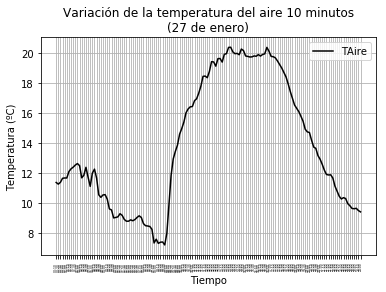

In [7]:
#Y ahora si graficamos
#Primero la temperatura del aire
t = df10min
a = dfTAir

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Black", label="TAire")

ax.set(xlabel="Tiempo", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del aire 10 minutos\n(27 de enero)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=3)

fig.savefig("Figura1")
plt.show()

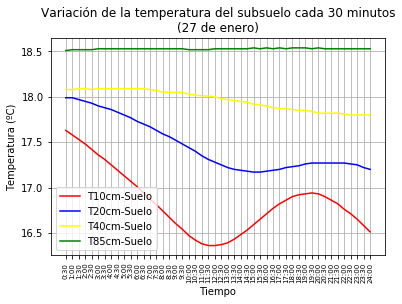

In [8]:
#Y ahora si la del suelo
t = df30min
a = dfTS10
b = dfTS20
c = dfTS40
d = dfTS85

fig, ax = plt.subplots()
line1 = ax.plot(t, a, color="Red", label="T10cm-Suelo")
line2 = ax.plot(t, b, color="Blue", label="T20cm-Suelo")
line3 = ax.plot(t, c, color="Yellow", label="T40cm-Suelo")
line4 = ax.plot(t, d, color="Green", label="T85cm-Suelo")

ax.set(xlabel="Tiempo", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo cada 30 minutos\n(27 de enero)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=7)

fig.savefig("Figura2")
plt.show()

In [9]:
#Realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para el año completo de datos 2009#

In [10]:
#Primero haremos arreglos con los datos
dfTAirA=df0M[["airT_Avg"]]
dfTS10A=df0S[["Tsuelo_10cm"]]
dfTS20A=df0S[["Tsuelo_20cm"]]
dfTS40A=df0S[["Tsuelo_40cm"]]
dfTS85A=df0S[["Tsuelo_85cm"]]

#Y del aire tomamos solo los de 2009
dfTAirA=dfTAirA[1:52338]

dfTAirA = dfTAirA.convert_objects(convert_numeric=True)

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


In [11]:
#Primero, crearemos un arreglo para la temperatura máxima
dfTAirMax=[0] * 365
dfTS10Max=[0] * 365
dfTS20Max=[0] * 365
dfTS40Max=[0] * 365
dfTS85Max=[0] * 365

#Y sacamos los máximos diarios de cada uno
#(Haremos el de la temperatura del aire por separado porque los intervalos son diferentes)
j=0

for i in range(0,52338,144):
    dfTAirMax[j]=dfTAirA[i:i+144].max()
    j=j+1

#Y ahora los del subsuelo
j=0

for i in range(0,17482,48):
    dfTS10Max[j]=dfTS10A[i:i+48].max()
    dfTS20Max[j]=dfTS20A[i:i+48].max()
    dfTS40Max[j]=dfTS40A[i:i+48].max()
    dfTS85Max[j]=dfTS85A[i:i+48].max()
    j=j+1

In [12]:
#Hacemos lo mismo con las mínimas
dfTAirMin=[0] * 365
dfTS10Min=[0] * 365
dfTS20Min=[0] * 365
dfTS40Min=[0] * 365
dfTS85Min=[0] * 365

#Y sacamos los máximos diarios de cada uno
#(Haremos el de la temperatura del aire por separado porque los intervalos son diferentes)
j=0

for i in range(0,52338,144):
    dfTAirMin[j]=dfTAirA[i:i+144].min()
    j=j+1

#Y ahora los del subsuelo
j=0

for i in range(0,17482,48):
    dfTS10Min[j]=dfTS10A[i:i+48].min()
    dfTS20Min[j]=dfTS20A[i:i+48].min()
    dfTS40Min[j]=dfTS40A[i:i+48].min()
    dfTS85Min[j]=dfTS85A[i:i+48].min()
    j=j+1

In [13]:
#Y por último el promedio
dfTAirProm=[0] * 365
dfTS10Prom=[0] * 365
dfTS20Prom=[0] * 365
dfTS40Prom=[0] * 365
dfTS85Prom=[0] * 365

#Y sacamos los máximos diarios de cada uno
#(Haremos el de la temperatura del aire por separado porque los intervalos son diferentes)
j=0

for i in range(0,52338,144):
    dfTAirProm[j]=dfTAirA[i:i+144].mean()
    j=j+1

#Y ahora los del subsuelo
j=0

for i in range(0,17482,48):
    dfTS10Prom[j]=dfTS10A[i:i+48].mean()
    dfTS20Prom[j]=dfTS20A[i:i+48].mean()
    dfTS40Prom[j]=dfTS40A[i:i+48].mean()
    dfTS85Prom[j]=dfTS85A[i:i+48].mean()
    j=j+1

In [14]:
#Hacemos un arreglo con los días del año
dfAño=[0] * 365
j=0

for i in range(0,365):
    dfAño[j]=i+1
    j=j+1

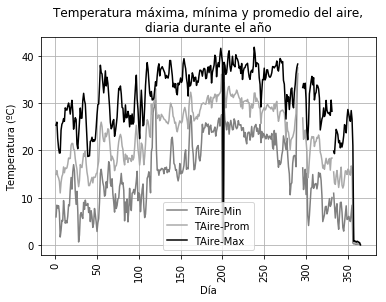

In [15]:
#Y graficamos todo
#Primero el aire
t = dfAño
a = dfTAirProm
b = dfTAirMax
c = dfTAirMin

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Gray", label="TAire-Min")
line2 = ax.plot(t, a, color="Darkgray", label="TAire-Prom")
line3 = ax.plot(t, b, color="Black", label="TAire-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del aire,\ndiaria durante el año")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura3")
plt.show()

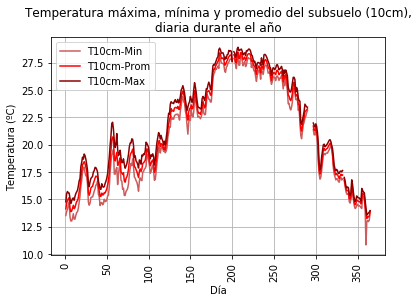

In [16]:
#Ahora la temperatura del suelo a 10cm
t = dfAño
a = dfTS10Prom
b = dfTS10Max
c = dfTS10Min

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Indianred", label="T10cm-Min")
line2 = ax.plot(t, a, color="Red", label="T10cm-Prom")
line3 = ax.plot(t, b, color="Darkred", label="T10cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (10cm),\ndiaria durante el año")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura4")
plt.show()

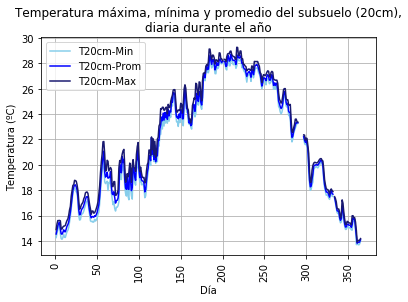

In [17]:
#La temperatura del suelo a 20cm
t = dfAño
a = dfTS20Prom
b = dfTS20Max
c = dfTS20Min

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Skyblue", label="T20cm-Min")
line2 = ax.plot(t, a, color="Blue", label="T20cm-Prom")
line3 = ax.plot(t, b, color="Midnightblue", label="T20cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (20cm),\ndiaria durante el año")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura5")
plt.show()

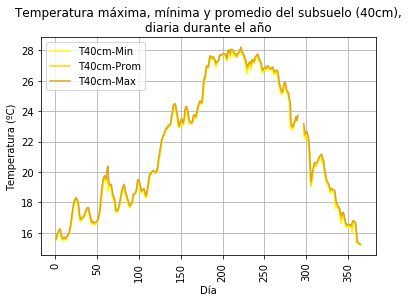

In [18]:
#La temperatura del suelo a 40cm
t = dfAño
a = dfTS40Prom
b = dfTS40Max
c = dfTS40Min

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Yellow", label="T40cm-Min")
line2 = ax.plot(t, a, color="Gold", label="T40cm-Prom")
line3 = ax.plot(t, b, color="Goldenrod", label="T40cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (40cm),\ndiaria durante el año")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura6")
plt.show()

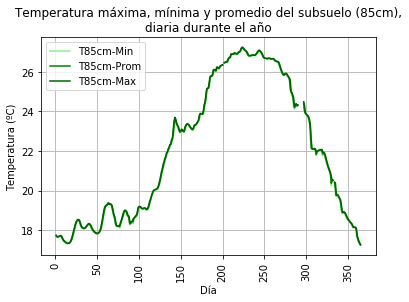

In [19]:
#La temperatura del suelo a 85cm
t = dfAño
a = dfTS85Prom
b = dfTS85Max
c = dfTS85Min

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Lightgreen", label="T85cm-Min")
line2 = ax.plot(t, a, color="Green", label="T85cm-Prom")
line3 = ax.plot(t, b, color="Darkgreen", label="T85cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (85cm),\ndiaria durante el año")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura7")
plt.show()

In [20]:
#Calcular el promedio cada 30 minutos durante el día para el mes de Enero de la temperatura del aire y las 8 temperaturas promedio de subsuelo, para posteriormente graficar la variación en 24 horas de las temperaturas de interés#

In [21]:
#Sacamos los promedios de los intervalos de 30 minutos de la temperatura del aire
#Para eso tomaremos cada tres 10 minutos y los iremos promediando
#Haremos uso de un loop
dfTAir030=df0M[["airT_Avg"]]

#Y convertimos el aire en float64
dfTAir030 = dfTAir030.convert_objects(convert_numeric=True)

dfTAir030=dfTAir030[1:4464]

dfTAir30=[0] * 1488
j=0

for i in range(0,4464,3):
    dfTAir30[j]=dfTAir030[i:i+3].mean()
    j=j+1

C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


In [22]:
#Y hacemos arreglos con las temperaturas del subsuelo en el mes de enero
#Y luego los del subsuelo
dfTS1030=df0S[["Tsuelo_10cm"]]
dfTS1030=dfTS1030[0:1488]

dfTS2030=df0S[["Tsuelo_20cm"]]
dfTS2030=dfTS2030[0:1488]

dfTS4030=df0S[["Tsuelo_40cm"]]
dfTS4030=dfTS4030[0:1488]

dfTS8530=df0S[["Tsuelo_85cm"]]
dfTS8530=dfTS8530[0:1488]

In [23]:
#Hacemos un arreglo donde salgan los días
#Se repetiran 48 veces, ya que hay 48 intervalos de 30 minutos en cada día
dfEnero=[0] * 1488
j=0

for i in range(0,1488):
    dfEnero[j]=i+1
    j=j+1

dfEnero24=[0] * 1488
j=0
k=1

for i in range(0,1488,48):
    for i in range(0,48):
        dfEnero24[j]=i+1
        j=j+1
    k=k+1

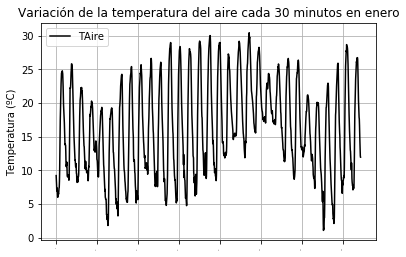

In [24]:
#Y volvemos a graficar
#De nuevo primero la temperatura del aire
t = dfEnero
a = dfTAir30

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Black", label="TAire")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del aire cada 30 minutos en enero")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura8")
plt.show()

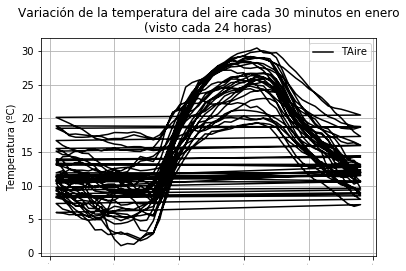

In [25]:
#Ahora graficaremos lo mismo, pero visto cada 24 horas, de forma que cada línea represente un día
t = dfEnero24
a = dfTAir30

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Black", label="TAire")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del aire cada 30 minutos en enero\n(visto cada 24 horas)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura9")
plt.show()

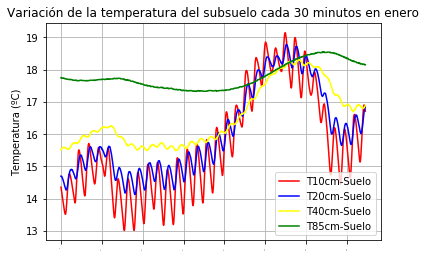

In [26]:
#Ahora vamos con las temperaturas del subsuelo
t = dfEnero
a = dfTS1030
b = dfTS2030
c = dfTS4030
d = dfTS8530

fig, ax = plt.subplots()
line1 = ax.plot(t, a, color="Red", label="T10cm-Suelo")
line2 = ax.plot(t, b, color="Blue", label="T20cm-Suelo")
line3 = ax.plot(t, c, color="Yellow", label="T40cm-Suelo")
line4 = ax.plot(t, d, color="Green", label="T85cm-Suelo")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo cada 30 minutos en enero")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura10")
plt.show()

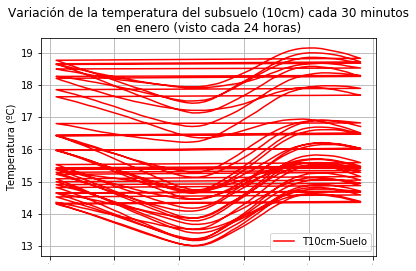

In [27]:
#Graficaremos lo mismo, pero visto cada 24 horas, de forma que cada línea represente un día
#Comenzaremos con la de 10cm
t = dfEnero24
a = dfTS1030

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Red", label="T10cm-Suelo")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo (10cm) cada 30 minutos\nen enero (visto cada 24 horas)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura11")
plt.show()

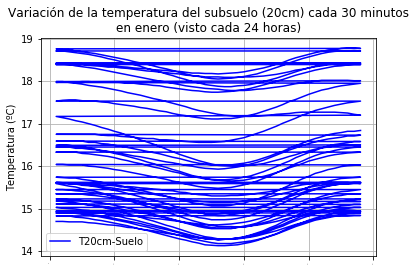

In [28]:
#Repetiremos con la de 20cm
t = dfEnero24
a = dfTS2030

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Blue", label="T20cm-Suelo")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo (20cm) cada 30 minutos\nen enero (visto cada 24 horas)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura12")
plt.show()

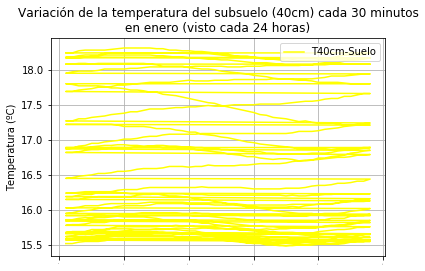

In [29]:
#La de 40cm
t = dfEnero24
a = dfTS4030

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Yellow", label="T40cm-Suelo")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo (40cm) cada 30 minutos\nen enero (visto cada 24 horas)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura13")
plt.show()

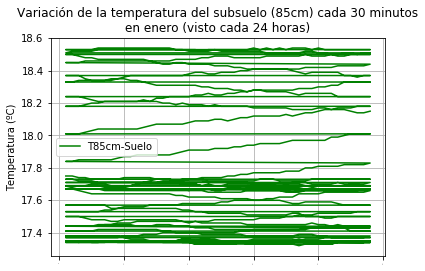

In [30]:
#Y la de 85cm
t = dfEnero24
a = dfTS8530

fig, ax = plt.subplots()
line = ax.plot(t, a, color="Green", label="T85cm-Suelo")

ax.set(xlabel="", ylabel="Temperatura (ºC)",
       title="Variación de la temperatura del subsuelo (85cm) cada 30 minutos\nen enero (visto cada 24 horas)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90,fontsize=0)

fig.savefig("Figura14")
plt.show()

In [31]:
#Introduciremos el concepto de promedio móvil (rolling mean), como método de suavizar la evolución temporal de una serie de tiempo, y se pide reproducir las gráficas suavizadas#

In [32]:
#Primero hacemos DataFrames
dfTAirProm=pd.DataFrame(dfTAirProm[0:364])
dfTAirMax=pd.DataFrame(dfTAirMax[0:364])
dfTAirMin=pd.DataFrame(dfTAirMin[0:364])

dfTS10Prom=pd.DataFrame(dfTS10Prom)
dfTS10Max=pd.DataFrame(dfTS10Max)
dfTS10Min=pd.DataFrame(dfTS10Min)

dfTS20Prom=pd.DataFrame(dfTS20Prom)
dfTS20Max=pd.DataFrame(dfTS20Max)
dfTS20Min=pd.DataFrame(dfTS20Min)

dfTS40Prom=pd.DataFrame(dfTS40Prom)
dfTS40Max=pd.DataFrame(dfTS40Max)
dfTS40Min=pd.DataFrame(dfTS40Min)

dfTS85Prom=pd.DataFrame(dfTS85Prom)
dfTS85Max=pd.DataFrame(dfTS85Max)
dfTS85Min=pd.DataFrame(dfTS85Min)

In [33]:
#Creamos los datos con el rolling mean
dfTAirPromRoll=dfTAirProm.rolling(3).mean()
dfTAirMaxRoll=dfTAirMax.rolling(3).mean()
dfTAirMinRoll=dfTAirMin.rolling(3).mean()

dfTS10PromRoll=dfTS10Prom.rolling(3).mean()
dfTS10MaxRoll=dfTS10Max.rolling(3).mean()
dfTS10MinRoll=dfTS10Min.rolling(3).mean()

dfTS20PromRoll=dfTS20Prom.rolling(3).mean()
dfTS20MaxRoll=dfTS20Max.rolling(3).mean()
dfTS20MinRoll=dfTS20Min.rolling(3).mean()

dfTS40PromRoll=dfTS40Prom.rolling(3).mean()
dfTS40MaxRoll=dfTS40Max.rolling(3).mean()
dfTS40MinRoll=dfTS40Min.rolling(3).mean()

dfTS85PromRoll=dfTS85Prom.rolling(3).mean()
dfTS85MaxRoll=dfTS85Max.rolling(3).mean()
dfTS85MinRoll=dfTS85Min.rolling(3).mean()

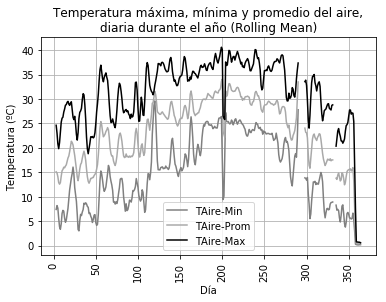

In [34]:
#Y graficamos todo
#Primero el aire
t = dfAño[0:364]
a = dfTAirPromRoll
b = dfTAirMaxRoll
c = dfTAirMinRoll

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Gray", label="TAire-Min")
line2 = ax.plot(t, a, color="Darkgray", label="TAire-Prom")
line3 = ax.plot(t, b, color="Black", label="TAire-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del aire,\ndiaria durante el año (Rolling Mean)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura15")
plt.show()

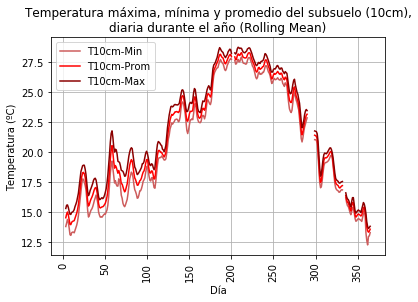

In [35]:
#Ahora la temperatura del suelo a 10cm
t = dfAño
a = dfTS10PromRoll
b = dfTS10MaxRoll
c = dfTS10MinRoll

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Indianred", label="T10cm-Min")
line2 = ax.plot(t, a, color="Red", label="T10cm-Prom")
line3 = ax.plot(t, b, color="Darkred", label="T10cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (10cm),\ndiaria durante el año (Rolling Mean)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura16")
plt.show()

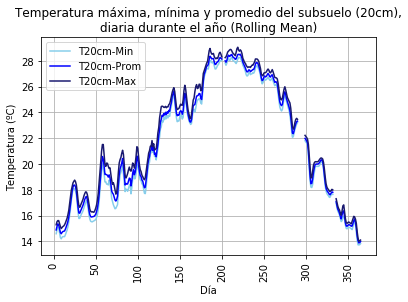

In [36]:
#La temperatura del suelo a 20cm
t = dfAño
a = dfTS20PromRoll
b = dfTS20MaxRoll
c = dfTS20MinRoll

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Skyblue", label="T20cm-Min")
line2 = ax.plot(t, a, color="Blue", label="T20cm-Prom")
line3 = ax.plot(t, b, color="Midnightblue", label="T20cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (20cm),\ndiaria durante el año (Rolling Mean)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura17")
plt.show()

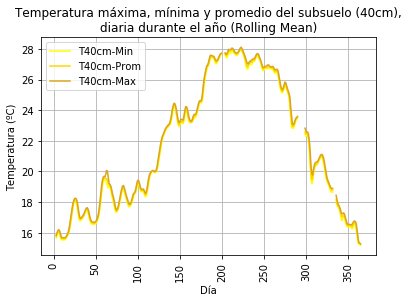

In [37]:
#La temperatura del suelo a 40cm
t = dfAño
a = dfTS40PromRoll
b = dfTS40MaxRoll
c = dfTS40MinRoll

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Yellow", label="T40cm-Min")
line2 = ax.plot(t, a, color="Gold", label="T40cm-Prom")
line3 = ax.plot(t, b, color="Goldenrod", label="T40cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (40cm),\ndiaria durante el año (Rolling Mean)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura18")
plt.show()

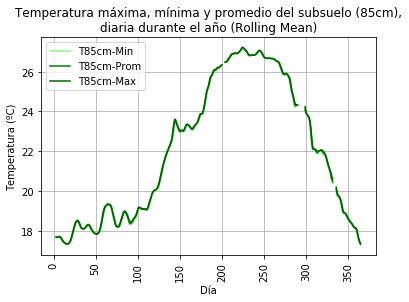

In [38]:
#La temperatura del suelo a 85cm
t = dfAño
a = dfTS85PromRoll
b = dfTS85MaxRoll
c = dfTS85MinRoll

fig, ax = plt.subplots()
line1 = ax.plot(t, c, color="Lightgreen", label="T85cm-Min")
line2 = ax.plot(t, a, color="Green", label="T85cm-Prom")
line3 = ax.plot(t, b, color="Darkgreen", label="T85cm-Max")

ax.set(xlabel="Día", ylabel="Temperatura (ºC)",
       title="Temperatura máxima, mínima y promedio del subsuelo (85cm),\ndiaria durante el año (Rolling Mean)")
ax.grid()
ax.legend(loc="best")
xticks(rotation=90)

fig.savefig("Figura19")
plt.show()